# import libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# importing the dataset

In [5]:
filepath = 'C:/Lamar_University/Spring_2023/Machine_Learning/Project_2/Rev/Grid_join_all_v4.csv'
dataset = pd.read_csv(filepath)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             937 non-null    int64  
 1   left           937 non-null    float64
 2   top            937 non-null    float64
 3   right          937 non-null    float64
 4   bottom         937 non-null    float64
 5   _mean          937 non-null    float64
 6   Chlorideme     937 non-null    float64
 7   Fluorideme     937 non-null    float64
 8   Hardnessme     937 non-null    float64
 9   SARmean        937 non-null    float64
 10  Sulfatemea     937 non-null    float64
 11  TDSmean        937 non-null    float64
 12  WellDepthm     937 non-null    float64
 13  Joined lay     937 non-null    float64
 14  LR_prob_Y      157 non-null    float64
 15  NBC_prob_Y     157 non-null    float64
 16  LR_pred_Y      157 non-null    float64
 17  label_NBCpred  157 non-null    float64
dtypes: float64

In [6]:
dataset.dropna(how='all', axis=0, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             937 non-null    int64  
 1   left           937 non-null    float64
 2   top            937 non-null    float64
 3   right          937 non-null    float64
 4   bottom         937 non-null    float64
 5   _mean          937 non-null    float64
 6   Chlorideme     937 non-null    float64
 7   Fluorideme     937 non-null    float64
 8   Hardnessme     937 non-null    float64
 9   SARmean        937 non-null    float64
 10  Sulfatemea     937 non-null    float64
 11  TDSmean        937 non-null    float64
 12  WellDepthm     937 non-null    float64
 13  Joined lay     937 non-null    float64
 14  LR_prob_Y      157 non-null    float64
 15  NBC_prob_Y     157 non-null    float64
 16  LR_pred_Y      157 non-null    float64
 17  label_NBCpred  157 non-null    float64
dtypes: float64

In [7]:
df = dataset[['id','left','top','right','bottom','LR_prob_Y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         937 non-null    int64  
 1   left       937 non-null    float64
 2   top        937 non-null    float64
 3   right      937 non-null    float64
 4   bottom     937 non-null    float64
 5   LR_prob_Y  157 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 44.0 KB


In [8]:
df.head(5)

,id,left,top,right,bottom,LR_prob_Y
0,1,-18545.2946,1196517.033,-13717.262600,1191689.001,NaN
1,2,-18545.2946,1191689.001,-13717.262600,1186860.969,NaN
2,3,-13717.2626,1201345.065,-8889.230595,1196517.033,NaN
3,4,-13717.2626,1196517.033,-8889.230595,1191689.001,NaN
4,5,-13717.2626,1191689.001,-8889.230595,1186860.969,0.988836


In [9]:
df_train = df.dropna(axis=0)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 4 to 883
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         157 non-null    int64  
 1   left       157 non-null    float64
 2   top        157 non-null    float64
 3   right      157 non-null    float64
 4   bottom     157 non-null    float64
 5   LR_prob_Y  157 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 8.6 KB


In [10]:
df_train.head(5)

,id,left,top,right,bottom,LR_prob_Y
4,5,-13717.2626,1191689.001,-8889.230595,1186860.969,0.988836
117,118,-119933.9666,1027535.913,-115105.934600,1022707.881,0.000018
134,135,-115105.9346,1099956.393,-110277.902600,1095128.361,0.000105
135,136,-115105.9346,1095128.361,-110277.902600,1090300.329,0.207235
138,139,-115105.9346,1080644.265,-110277.902600,1075816.233,0.000080


In [11]:
X = df_train[df_train.columns[1:5]].copy()
y = df_train['LR_prob_Y'].copy()

In [12]:
X

,left,top,right,bottom
4,-13717.262600,1191689.001,-8889.230595,1186860.969
117,-119933.966600,1027535.913,-115105.934600,1022707.881
134,-115105.934600,1099956.393,-110277.902600,1095128.361
135,-115105.934600,1095128.361,-110277.902600,1090300.329
138,-115105.934600,1080644.265,-110277.902600,1075816.233
...,...,...,...,...
855,-8889.230595,1167548.841,-4061.198595,1162720.809
857,-8889.230595,1157892.777,-4061.198595,1153064.745
866,-4061.198595,1167548.841,766.833405,1162720.809
881,5594.865405,1182032.937,10422.897400,1177204.905


# Training the K-NN model on the Training set

In [13]:
from sklearn.neighbors import KNeighborsRegressor
# default hyperparameters
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                          metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(X,y)

KNeighborsRegressor()

In [14]:
pred = knn.predict(X)

In [15]:
from sklearn import metrics

In [16]:
# r2 score
r2 = metrics.r2_score(y, pred)
print(r2)

0.65137642702558


## predict all location

In [17]:
X_all = df.iloc[:,1:5]
X_all.head(5)

,left,top,right,bottom
0,-18545.2946,1196517.033,-13717.262600,1191689.001
1,-18545.2946,1191689.001,-13717.262600,1186860.969
2,-13717.2626,1201345.065,-8889.230595,1196517.033
3,-13717.2626,1196517.033,-8889.230595,1191689.001
4,-13717.2626,1191689.001,-8889.230595,1186860.969


In [18]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   left    937 non-null    float64
 1   top     937 non-null    float64
 2   right   937 non-null    float64
 3   bottom  937 non-null    float64
dtypes: float64(4)
memory usage: 29.4 KB


In [19]:
df_pred = knn.predict(X_all)

In [20]:
# convert numpy array to pandas dataframe
df_pred = pd.DataFrame(df_pred, columns = ['KNNlr_pred'])
df_pred.index = dataset.index
df_concat = dataset.iloc[:,:5]
df_KNNpred = pd.concat([df_concat, df_pred], axis=1)
df_KNNpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          937 non-null    int64  
 1   left        937 non-null    float64
 2   top         937 non-null    float64
 3   right       937 non-null    float64
 4   bottom      937 non-null    float64
 5   KNNlr_pred  937 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 44.0 KB


In [21]:
df_KNNpred.to_csv('C:/Lamar_University/Spring_2023/Machine_Learning/Project_2/Rev/WoodbineGrid_KNN_lr.csv')

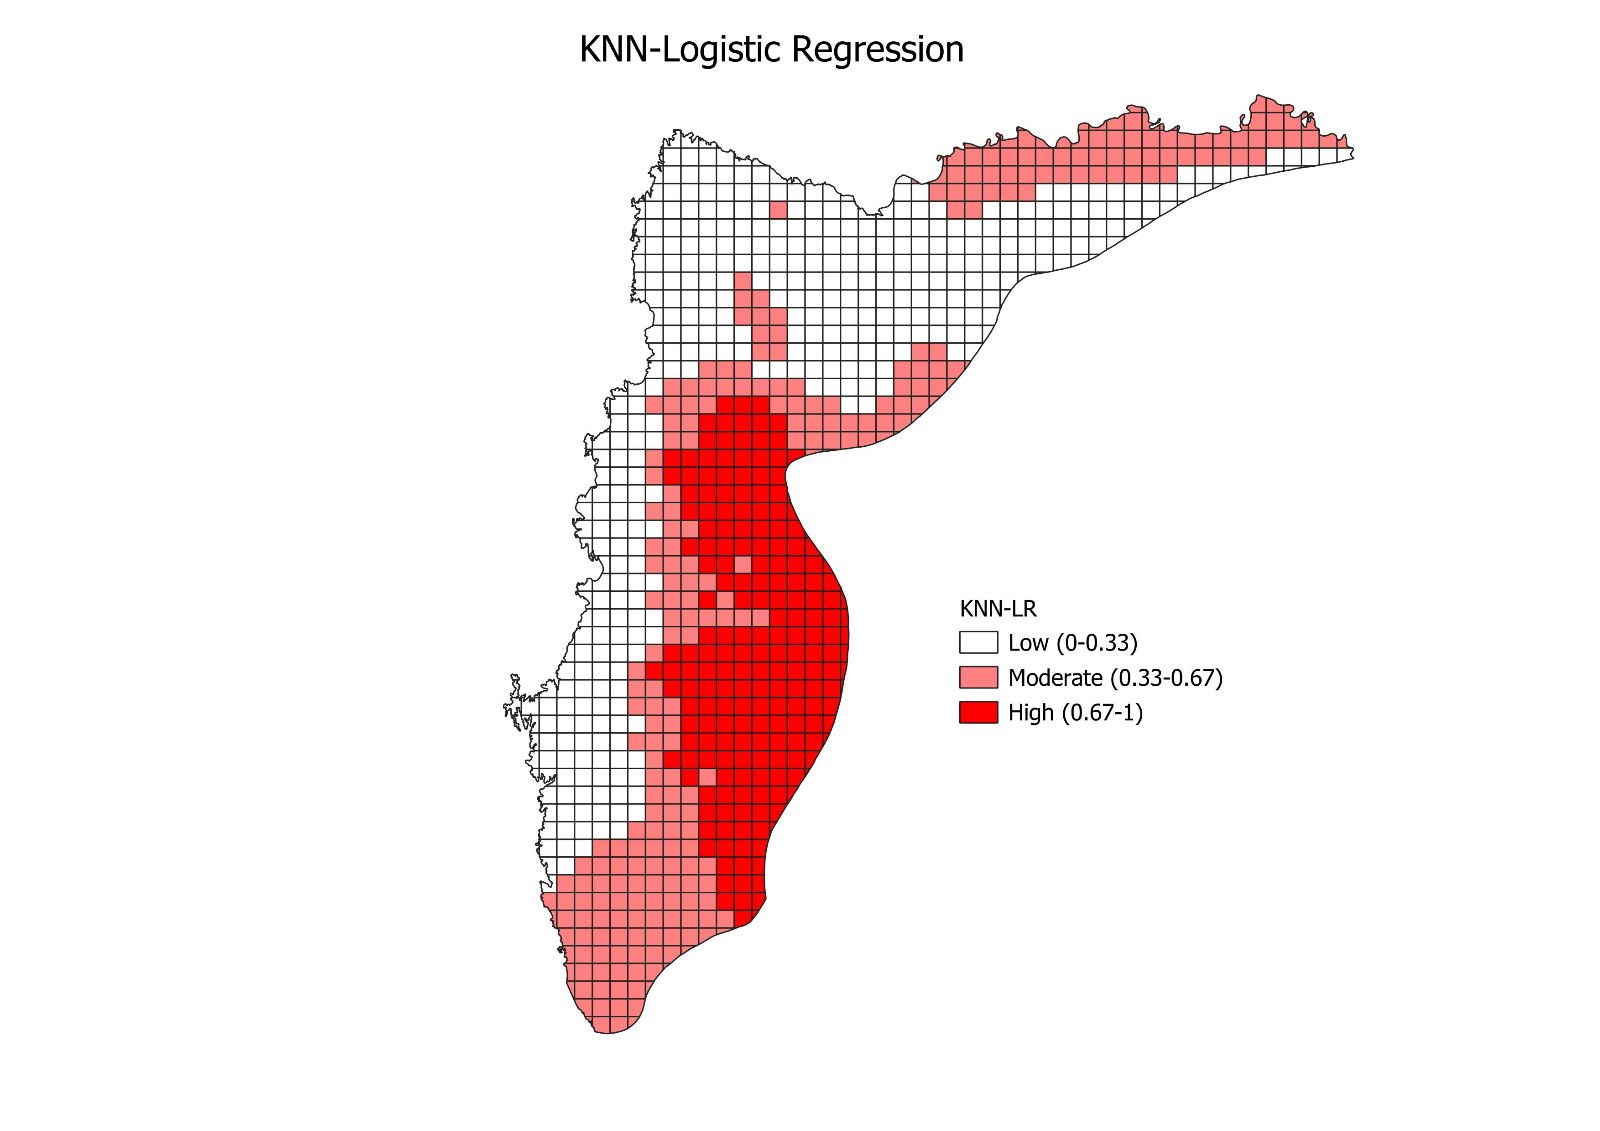